In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

In [2]:
df = pd.read_csv('large_twitch_features.csv')

In [3]:
G = nx.Graph()

for index, row in df.iterrows():
    G.add_node(row['numeric_id'], 
               views=row['views'], 
               mature=row['mature'], 
               life_time=row['life_time'], 
               created_at=row['created_at'], 
               updated_at=row['updated_at'], 
               dead_account=row['dead_account'], 
               language=row['language'], 
               affiliate=row['affiliate'])
    
df_edges = pd.read_csv('large_twitch_edges.csv')

for index, row in df_edges.iterrows():
    G.add_edge(row['numeric_id_1'], row['numeric_id_2'])

In [4]:
print(len(G.nodes()))
print(len(G.edges()))

168114
6797557


In [5]:
df.head()

views  mature  life_time  created_at  updated_at  numeric_id  \
0    7879       1        969  2016-02-16  2018-10-12           0   
1     500       0       2699  2011-05-19  2018-10-08           1   
2  382502       1       3149  2010-02-27  2018-10-12           2   
3     386       0       1344  2015-01-26  2018-10-01           3   
4    2486       0       1784  2013-11-22  2018-10-11           4   

   dead_account language  affiliate  
0             0       EN          1  
1             0       EN          0  
2             0       EN          1  
3             0       EN          0  
4             0       EN          0

In [6]:
df.describe()

views         mature      life_time     numeric_id  \
count  1.681140e+05  168114.000000  168114.000000  168114.000000   
mean   1.881618e+05       0.470116    1541.812116   84056.500000   
std    3.326119e+06       0.499108     715.704133   48530.475915   
min    0.000000e+00       0.000000      11.000000       0.000000   
25%    1.415000e+03       0.000000     997.000000   42028.250000   
50%    4.117000e+03       0.000000    1540.000000   84056.500000   
75%    1.420800e+04       1.000000    2027.000000  126084.750000   
max    3.843966e+08       1.000000    4161.000000  168113.000000   

        dead_account      affiliate  
count  168114.000000  168114.000000  
mean        0.030688       0.485064  
std         0.172470       0.499778  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000

In [7]:
def plot_views(df, bins=None):
    # Histogram, box plot

    # Histogram
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    if bins is None:
        bins = [10**i for i in range(0, 9)]
    plt.hist(df['views'], bins=bins)
    plt.xlabel('Views')
    plt.ylabel('Frequency')
    plt.title('Histogram of Views')
    plt.xscale('log')

    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df['views'])
    plt.title('Box Plot of Views')
    plt.yscale('log')



    plt.show()

    # Quantile distribution of views
    quantiles = np.percentile(df['views'], np.arange(10, 110, 10))
    df_quantiles = pd.DataFrame({
        'Quantile': np.arange(10, 110, 10),
        'Views': quantiles
    })
    print(df_quantiles)

In [8]:
bins = [10**i for i in range(0, 9)]
new_bins = []

for i in range(len(bins)-1):
    new_bins.append(bins[i])
    middle_point = math.sqrt(bins[i] * bins[i+1])
    new_bins.append(middle_point)

new_bins.append(bins[-1])
plot_views(df, bins=new_bins)

   Quantile        Views
0        10        529.0
1        20       1082.0
2        30       1791.0
3        40       2721.0
4        50       4117.0
5        60       6394.0
6        70      10552.0
7        80      20333.4
8        90      60944.9
9       100  384396587.0


In [9]:
df_filtered = df[(df['views'] > 1e4)]

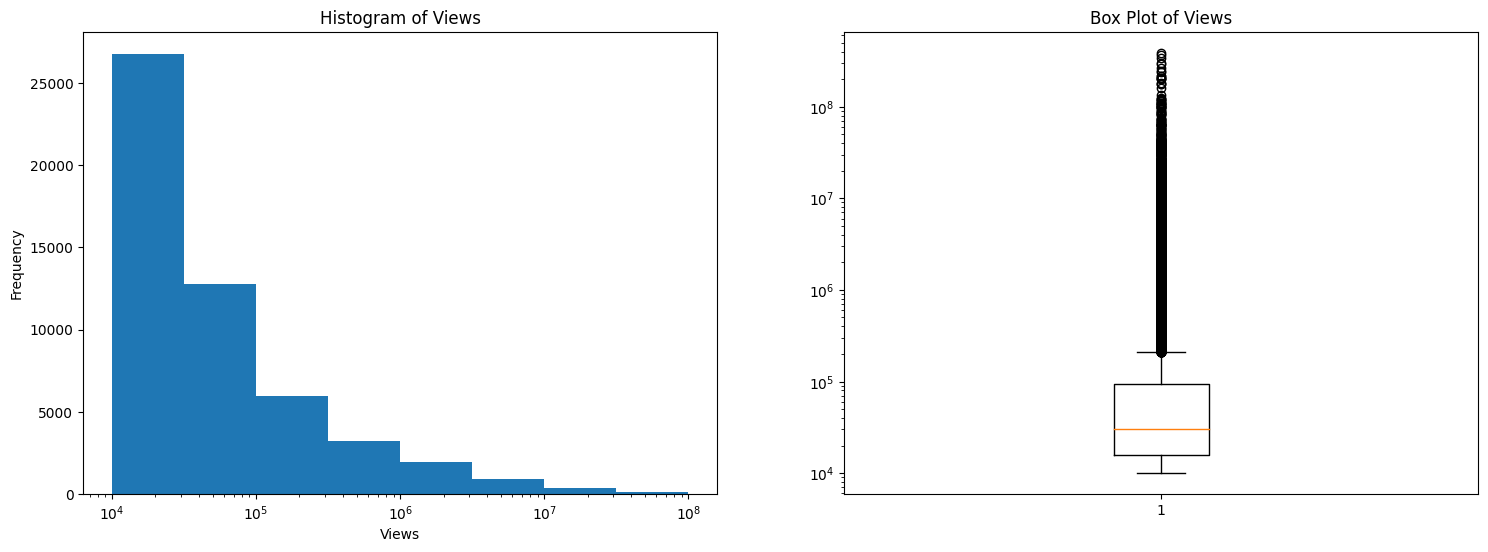

   Quantile        Views
0        10      11917.0
1        20      14402.8
2        30      17822.0
3        40      22766.0
4        50      30252.0
5        60      43023.6
6        70      68591.2
7        80     139381.6
8        90     490804.6
9       100  384396587.0


In [10]:
bins = [10**i for i in range(4, 9)]
new_bins = []

for i in range(len(bins)-1):
    new_bins.append(bins[i])
    middle_point = math.sqrt(bins[i] * bins[i+1])
    new_bins.append(middle_point)

new_bins.append(bins[-1])

plot_views(df_filtered, bins=new_bins)

In [11]:
#remove nodes with less than 1e4 views
for node in list(G.nodes()):
    if G.nodes[node]['views'] < 1e4:
        G.remove_node(node)

In [12]:
print(len(G.nodes()))
print(len(G.edges()))

52096
2626990


In [31]:
#save graph
nx.write_gpickle(G, 'twitch_graph.gpickle')

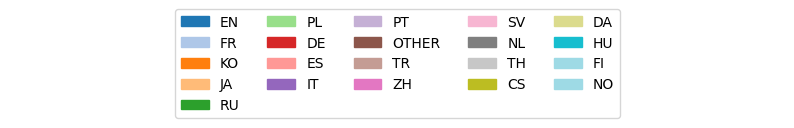

In [13]:
# Assign a color to each language in languages
languages = df['language'].unique()
colors = plt.cm.get_cmap('tab20', len(languages))
color_map = {languages[i]: colors(i) for i in range(len(languages))}

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=language) for language, color in color_map.items()]
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(10, 1))
# Add the patches to the legend
ax.legend(handles=patches, loc='center', ncol=5)
# Hide the axes
ax.axis('off')

plt.show()

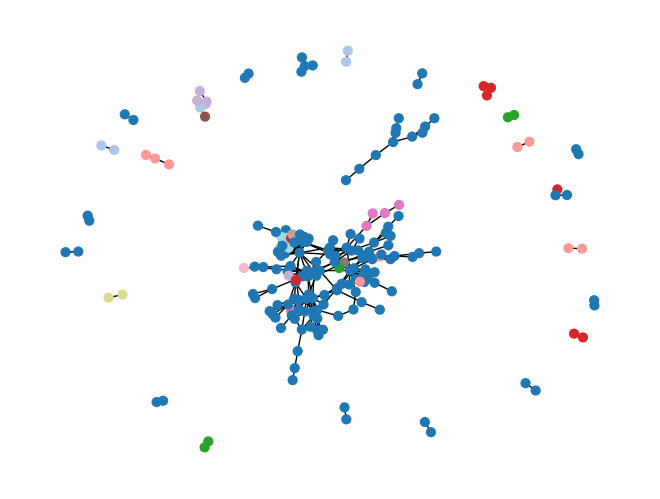

In [14]:
# Take a random sample of nodes
sample_nodes = random.sample(G.nodes(), 500)

H = G.subgraph(sample_nodes)
# Remove nodes with no edges from H
H = H.subgraph([node for node, degree in dict(H.degree()).items() if degree > 0])
# Create a list of colors for each node in the subgraph
node_colors = [color_map[H.nodes[node]['language']] for node in H.nodes()]

# Draw the subgraph with node colors
nx.draw(H, node_color=node_colors, with_labels=False, node_size=40)

plt.show()

In [32]:
color_map

{'EN': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 'FR': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 'KO': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'JA': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'RU': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 'PL': (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 'DE': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 'ES': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'IT': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'PT': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 'OTHER': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'TR': (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
 'ZH': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 'SV': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0),
 

In [33]:
#save color map for consistency
with open('color_map.pkl', 'wb') as f:
    pickle.dump(color_map, f)